In [ ]:
import csv
xs = []
ys = []
with open("housing_prices.csv", "r") as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        xs.append(float(row[0]))
        ys.append(float(row[1]))

In [ ]:
# J(m,b) = (1/n) * Σ (m x_i + b - y_i)^2
# ∂J/∂m = (2/n) * Σ x_i (m x_i + b - y_i)
# ∂J/∂b = (2/n) * Σ (m x_i + b - y_i)
import numpy as np
x = np.array(xs)
y = np.array(ys)
m = 0.0
b = 0.0
lr = 1e-8
epochs = 1e4
n = len(x)
for _ in range(int(epochs)):
    y_pred = m * x + b
    error = y_pred - y

    dJ_dm = (2.0 / n)*np.sum(x*error)
    dJ_db = (2.0 / n)*np.sum(error)

    m = m - lr*dJ_dm
    b = b - lr*dJ_db

print(f"[GD] slope m = {m}")
print(f"[GD] intercept b = {b}")

[GD] slope m = 171.8695669565231
[GD] intercept b = 0.09759995007926663


In [ ]:
sq_ft = 2500
pred = m*sq_ft + b
print(f"[GD] Predicted price for 2500 sqft: {pred:.2f}")

[GD] Predicted price for 2500 sqft: 429674.01


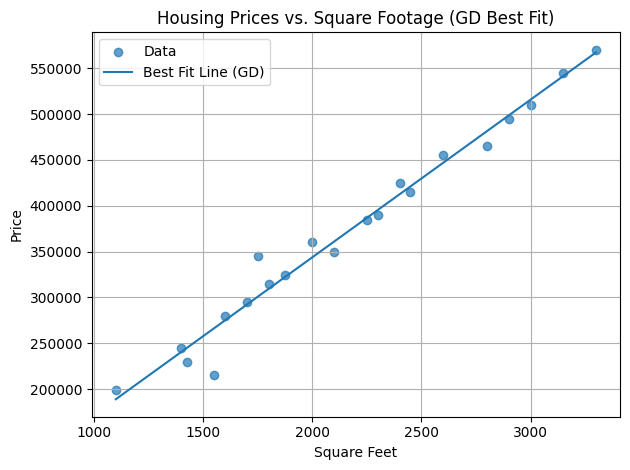

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y, label="Data", alpha=0.7)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = m*x_line + b
plt.plot(x_line, y_line, label="Best Fit Line (GD)")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Housing Prices vs. Square Footage (GD Best Fit)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()